# TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a>
    <ul>
    <li><a href="#rq1">Research Question 1</a></li>
    <li><a href="#rq2">Research Question 2</a></li>
    </ul>
    </li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.

> + Question 1: Which genres are most popular from year to year?
+ Question 2: Which production company earn the highest revenue over the year? 

In [1]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Acquire Data
We start by acquiring the tmdb movies dataset into Pandas DataFrames. 

In [2]:
tmdb_df = pd.read_csv('./input/tmdb-movies.csv')

### Analyze by describing data

We can use pandas to answer following questions in our project.

**Which features are available in the dataset?**

There are total 21 features in this dataset.

In [3]:
#preview the features
print(tmdb_df.columns.values)

['id' 'imdb_id' 'popularity' 'budget' 'revenue' 'original_title' 'cast'
 'homepage' 'director' 'tagline' 'keywords' 'overview' 'runtime' 'genres'
 'production_companies' 'release_date' 'vote_count' 'vote_average'
 'release_year' 'budget_adj' 'revenue_adj']


**Which features contain blank, null or empty values?**

+ homepage > tagline > keywords > production_companies features contain a number of null walues in that order for the training dataset.

**Which are the data types for various features?**

Helping us during cleaning and converting goal.
+ 11 features are strings (object).
+ 10 features are integer or floats.

In [4]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**What is the distribution of numerical feature value across the samples?**

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

+ There are 25% movies get the vote average above 6.6 to 9.2.
+ The samples movies release between 1960 to 2015.
+ The average of movie runtime are 102 minutes.
+ Few movies (<1%) have exstreamly long runtime (900 minutes).
+ Few movies get large number of vote count max at 9767.
+ Only few movies (<1%) have high popularity.
+ There is missing value in budget and revenue.

In [5]:
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**What is the distribution of categorical features?**

+ imdb_id should be unique at all, but the is an id have freq=2.
+ original_title(unique=10571, count=10866), the is some movie name repeated. 

In [6]:
tmdb_df.describe(include=['O'])

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date
count,10856,10866,10790,2936,10822,8042,9373,10862,10843,9836,10866
unique,10855,10571,10719,2896,5067,7997,8804,10847,2039,7445,5909
top,tt0411951,Hamlet,Louis C.K.,http://www.missionimpossible.com/,Woody Allen,Based on a true story.,woman director,No overview found.,Comedy,Paramount Pictures,1/1/09
freq,2,4,6,4,45,5,134,13,712,156,28


### Data Cleaning

+ We are going to drop homepage > tagline > keywords > production_companies > cast due to too many missing data.
+ Also drop imdb_id > overview > runtime > release_date because we are not going to use it.

In [7]:
tmdb_df = tmdb_df.drop(['homepage','tagline','keywords','cast'], 1)
tmdb_df = tmdb_df.drop(['imdb_id','overview', 'runtime','release_date'], 1)
tmdb_df.head()

,id,popularity,budget,revenue,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

> First step, we are going to separate the genre details along with the years to analyze the data. The DataFrame provides information about the number of movies produced in each genre for every year.

> Second step, we look into the popularity value of the movies according to their genres for every year. 

<a id='rq1'></a>
### Research Question 1: Which genres are most popular from year to year?

Let see how many movies produced over the year.

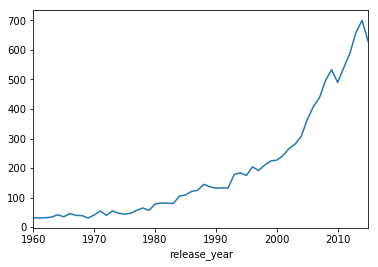

In [8]:
df_movie_year = tmdb_df.groupby('release_year')['original_title'].count()
df_movie_year.plot()

In [9]:
#get the genre colunms
genre_details = tmdb_df['genres']

#seperate genre type into a list
genre = []
for genre_detail in genre_details:
    split_genre = str(genre_detail).split('|')
    for i in split_genre:
        if i not in genre:
            genre.append(i)

#preveiw all the type of genre in the sample
print(genre)

['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary', 'TV Movie', 'nan', 'Foreign']


There are 20 different genres and some with no genre information(nan).

Next, we explore years dataset.
+ From describe we know the range of year is between 1960 and 2015.

In [10]:
#obtain the min and max year
min_year = tmdb_df['release_year'].min()
max_year = tmdb_df['release_year'].max()

We create a new dataframe to contain genres for every year, with index=genres and columns=years.

In [11]:
#create a DataFrame to contain genres for every year
genre_df = pd.DataFrame(index = genre, columns = range(min_year, max_year+1))
#fill in value start from zero
genre_df = genre_df.fillna(value=0)
genre_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adventure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Science Fiction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Thriller,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, we split the genre type from every row, and fill in to every year.

In [12]:
z = 0
for i in genre_details:
    split_genre = str(i).split('|')
    year = tmdb_df.loc[z, 'release_year']
    for a in split_genre:
        genre_df.loc[a, year] += 1
    z += 1

In [13]:
#preveiw new data,genre for every year
genre_df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,8,7,8,4,5,9,14,7,6,10,...,80,95,99,108,108,115,99,121,129,107
Adventure,5,6,7,7,5,6,11,7,5,5,...,55,60,63,72,59,62,50,67,67,69
Science Fiction,3,4,2,2,4,2,6,4,4,3,...,30,41,52,71,46,56,54,61,62,86
Thriller,6,0,7,10,9,11,8,5,5,3,...,114,125,127,157,135,146,160,175,179,171
Fantasy,2,2,1,2,4,0,2,3,5,2,...,34,47,43,49,44,46,34,39,36,33
Crime,2,2,3,4,10,2,5,7,5,3,...,53,65,62,52,51,48,54,71,65,51
Western,6,3,3,2,1,4,7,2,1,7,...,1,5,2,0,6,3,4,3,6,6
Drama,13,16,21,13,20,20,16,16,20,13,...,197,197,233,224,211,214,232,253,284,260
Family,3,5,2,3,4,3,7,3,5,4,...,65,45,56,60,55,72,42,48,43,44
Animation,0,1,0,1,2,1,3,2,3,3,...,39,32,33,48,50,46,40,42,36,39


**Observation**
We can observe that Drama has the significant amount above all others genres.

We going to create a line chart to displayed only top 10 genres.

In [14]:
#preview the sum of top10 genres in 1960-2015
sum_movies = genre_df.sum(axis=1)
top10 = sum_movies.sort_values(ascending=False).head(10)

print(top10)

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
dtype: int64


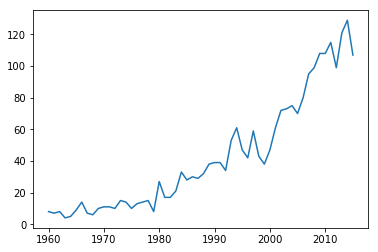

In [15]:
plt.plot(genre_df.loc['Action'])

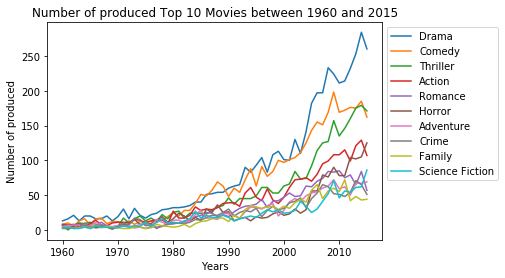

In [16]:
g = top10.index.values

for i in g:
    plt.plot(genre_df.loc[i])

plt.rcParams['figure.figsize'] = (10,5)
plt.title("Number of produced Top 10 Movies between 1960 and 2015")
plt.xlabel("Years")
plt.ylabel("Number of produced")
plt.legend(g, loc=2, bbox_to_anchor=(1, 1))
plt.show()

Next, we create another similar dataframe as above to contain the popularity value of the movies according to their genres for every year.

In [17]:
#create a DataFrame to contain popularity of genres for every year
popularity_df = pd.DataFrame(index = genre, columns = range(min_year, max_year + 1))
#fill in the value start from 0.0
popularity_df = popularity_df.fillna(value = 0.0)
popularity_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adventure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Science Fiction,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thriller,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fantasy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
z = 0

for i in genre_details:
    split_genre = str(i).split('|')
    popularity = tmdb_df.loc[z, 'popularity']
    year = tmdb_df.loc[z, 'release_year']
    for a in split_genre:
        popularity_df.loc[a, year] += popularity
    z += 1

In [19]:
popularity_df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,4.725796,2.561389,5.671563,3.806916,4.065433,4.062358,3.686859,5.064989,2.193374,5.399760,...,60.259233,72.254120,88.585296,93.794086,100.713037,121.681073,111.986677,122.089178,216.979690,240.901421
Adventure,3.504904,4.603938,6.597594,5.099410,3.682157,3.490923,3.229519,7.178829,5.545733,3.744663,...,51.830019,51.230969,63.528230,81.966362,80.258813,70.028286,73.073879,84.475720,162.845275,226.581261
Science Fiction,0.983714,1.096410,0.358424,0.935671,0.906544,0.203911,1.906741,0.749862,5.374567,0.517620,...,23.845715,25.209269,40.234346,70.260241,37.820094,54.259455,50.663266,75.875393,142.255997,193.121886
Thriller,4.871460,0.000000,5.324075,7.199292,5.603219,3.773787,2.190952,3.509897,2.779596,2.613848,...,75.973838,92.120424,86.206629,102.665018,99.989104,116.041838,108.295298,128.550095,186.504459,239.720907
Fantasy,0.856495,0.308146,0.235542,0.428142,2.399162,0.000000,0.849542,0.561027,2.227921,0.408196,...,34.786562,44.995426,37.681697,50.608117,46.964090,46.534893,46.166250,39.743062,65.856645,57.427532
Crime,0.692959,1.613038,1.418448,2.209470,2.616900,0.774553,1.703508,3.768515,2.779596,2.844060,...,35.458092,44.358441,47.708682,28.100370,35.293322,42.801786,46.632713,65.017269,57.459754,87.823617
Western,3.406554,0.630062,1.242541,0.493914,0.127679,0.767331,1.712597,0.379480,0.621202,3.564572,...,0.463068,2.559719,0.731827,0.000000,4.347770,3.527401,6.931111,1.995766,4.043682,19.072777
Drama,7.361967,6.915731,8.232008,4.191829,7.296370,6.105756,5.436264,8.183477,7.546450,6.368528,...,109.448943,109.945124,123.854529,126.897208,123.715224,128.088313,140.376994,166.999176,246.362717,243.848091
Family,0.834191,3.778608,0.646926,2.557897,3.513194,1.988139,2.792269,2.886044,2.131317,1.609108,...,50.407490,39.023420,44.220459,49.350055,53.233292,55.893736,31.257886,39.526268,47.765725,60.237690
Animation,0.000000,2.631987,0.000000,2.180410,0.891493,0.600975,1.757152,2.697610,0.906404,0.876822,...,31.127168,22.483369,28.397969,39.754622,34.745996,44.387170,32.214146,36.320297,40.464223,44.705638


Use function to standardize the data of values in the popularity dataframe so that the data does not contain any discrepancies.
Positive value indicates the movie is popular and the negative value indicates the movie is unpopular or less popular comparatively.

In [20]:
def standardize(data):
    data_std = (data - data.mean()) / data.std(ddof = 0)
    return data_std

In [21]:
popularity_std = standardize(popularity_df)
popularity_std

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,1.343888,0.348172,1.605126,0.763857,0.718732,1.470893,1.246839,1.011440,-0.071646,2.024968,...,0.878259,1.187646,1.478735,1.279138,1.566287,1.812734,1.674032,1.544474,1.890421,1.778593
Adventure,0.753047,1.338265,1.996432,1.398764,0.550490,1.124313,0.951448,1.817532,1.534066,1.097634,...,0.608896,0.520337,0.755137,0.977663,1.027009,0.586530,0.732253,0.755530,1.174435,1.614759
Science Fiction,-0.467064,-0.361952,-0.640003,-0.646572,-0.667888,-0.869288,0.097082,-0.634089,1.452081,-0.710447,...,-0.285369,-0.305635,0.082456,0.679288,-0.091894,0.212188,0.189865,0.575138,0.902119,1.231957
Thriller,1.414381,-0.893419,1.458291,2.430280,1.393755,1.295872,0.280651,0.418422,0.209143,0.464049,...,1.380434,1.818235,1.410043,1.505248,1.547200,1.678862,1.584692,1.679992,1.487353,1.765087
Fantasy,-0.528631,-0.744050,-0.691929,-0.895883,-0.012691,-0.992961,-0.585750,-0.706100,-0.055098,-0.771756,...,0.064256,0.322410,0.008741,0.178378,0.149189,0.028812,0.081027,-0.182739,-0.108344,-0.320493
Crime,-0.607773,-0.111525,-0.192078,-0.020849,0.082887,-0.523188,-0.034184,0.517043,0.209143,0.593035,...,0.085715,0.302191,0.298300,-0.395319,-0.158512,-0.059809,0.092316,0.347388,-0.219402,0.027262
Western,0.705451,-0.588007,-0.266409,-0.863575,-1.009777,-0.527569,-0.028313,-0.775331,-0.824684,0.996730,...,-1.032584,-1.024569,-1.058297,-1.111565,-0.974396,-0.992158,-0.868553,-0.974491,-0.925887,-0.759302
Drama,2.619644,2.458868,2.687073,0.952936,2.136978,2.710231,2.376758,2.200644,2.492369,2.567760,...,2.450163,2.384021,2.497239,2.122898,2.172743,1.964838,2.361142,2.486464,2.279043,1.812305
Family,-0.539425,0.938199,-0.518093,0.150307,0.476322,0.212862,0.669034,0.180522,-0.101370,-0.098897,...,0.563438,0.132849,0.197567,0.146311,0.314477,0.250985,-0.279790,-0.187286,-0.347616,-0.288343
Animation,-0.943125,0.382394,-0.791460,-0.035124,-0.674495,-0.628465,0.000464,0.108664,-0.688078,-0.509190,...,-0.052683,-0.392159,-0.259355,-0.098265,-0.172943,-0.022173,-0.256646,-0.254532,-0.444186,-0.466042


In [22]:
pop_genre = pd.Series(index = range(min_year, max_year + 1))
pop_genre.head()

1960   NaN
1961   NaN
1962   NaN
1963   NaN
1964   NaN
dtype: float64

In [23]:
for i in range(min_year, max_year + 1):
    pop_genre[i] = popularity_std[i].argmax()

In [24]:
pop_genre.describe()

count        56
unique        5
top       Drama
freq         39
dtype: object

We can observe the most popular genre is Drama in 39 years over 56 years.
The graph below is the changes in the popularity levels for "Drama" genre is depicated over the year.

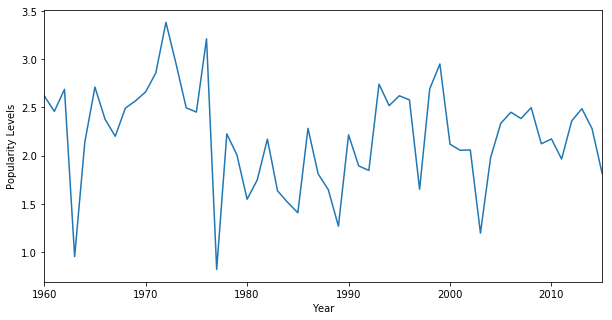

In [25]:
popularity_std.loc['Drama'].plot()
plt.xlabel('Year')
plt.ylabel('Popularity Levels')

<a id='rq2'></a>
### Research Question 2: Which production company earn the highest revenue over the year?

To research which company earn the most over the year, first we create a function to seperate the names.

In [26]:
#output the production companies names 
production_details = tmdb_df['production_companies']
#create an empty array to store splited name
production = []
for a in production_details:
    split_production = str(a).split('|')
    for b in split_production:
        if b not in production:
            production.append(b)
#preview the production companies name
print(production[0:4])

['Universal Studios', 'Amblin Entertainment', 'Legendary Pictures', 'Fuji Television Network']


Create a structure with index = production componies and columns = years.

In [27]:
production_df = pd.DataFrame(index = production, columns = range(min_year, max_year + 1))
production_df = production_df.fillna(value = 0.0)
production_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Universal Studios,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amblin Entertainment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Legendary Pictures,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fuji Television Network,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dentsu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Fill in the revenue_adj in based on every companies each year.

In [28]:
row = 0 
for a in production_details:
    split_production = str(a).split('|')
    year = tmdb_df.loc[row, 'release_year']
    revenue_adj = tmdb_df.loc[row, 'revenue_adj']
    for b in split_production:
        production_df.loc[b, year] += revenue_adj
    row += 1

In [29]:
production_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Universal Studios,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.751681e+08,2.939349e+07,1.392446e+09
Amblin Entertainment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.971870e+08,7.463795e+08,0.000000e+00,8.500129e+08,1.051976e+08,7.848450e+08,8.541242e+08,0.000000e+00,3.079952e+08,1.542047e+09
Legendary Pictures,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.755484e+08,4.444461e+08,1.284134e+09,8.426834e+08,1.424020e+09,3.337138e+08,1.312586e+09,1.525862e+09,1.862132e+09,1.751299e+09
Fuji Television Network,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.985220e+08,1.521978e+09
Dentsu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,4.403131e+08,1.132928e+08,0.000000e+00,5.114932e+08,7.382306e+08,1.985220e+08,2.907727e+09


There is too many companies, we take out the top 10 revenue companies.

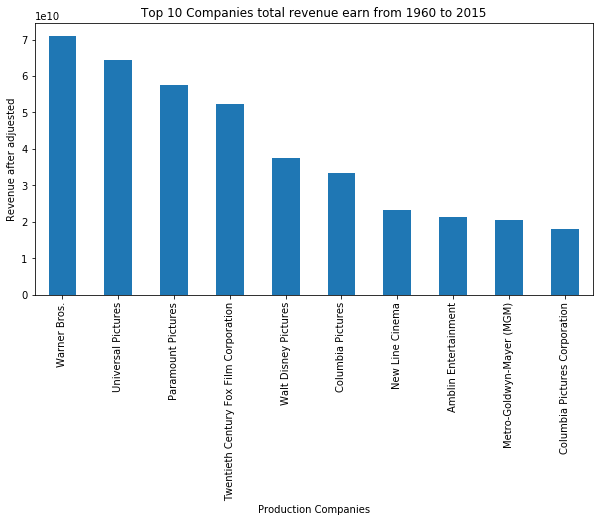

In [30]:
top10_production = production_df.sum(axis=1).sort_values(ascending=False).head(10)
top10_production.plot(kind='bar')
plt.xlabel("Production Companies")
plt.ylabel("Revenue after adjuested")
plt.title('Top 10 Companies total revenue earn from 1960 to 2015')

Let's have a see Warner Bros. earning from 1960 to 2015. We can see that there was a continues increasing. the highest revenue earn was between 2002 and 2008.

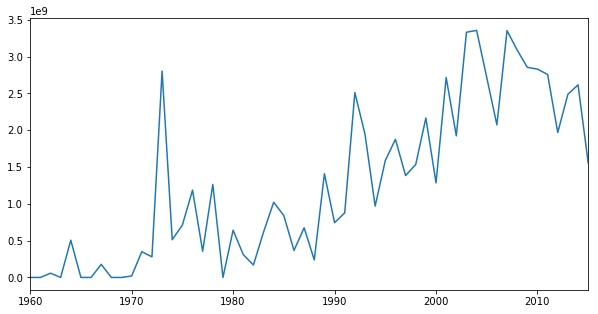

In [31]:
production_df.loc['Warner Bros.'].plot()

<a id='conclusions'></a>
## Conclusions

**Research Question 1: Which genres are most popular from year to year?**

We can make a conclusions that drama is the most popular movies and most production between year 1960 and 2015. Base on the observation from the graph, we can see the mean of standardize popularity year to year is around 2.5(zero as normal, negative as unpopular, positive as popular), which is highly popular.

**Research Question 2: Which production company earn the highest revenue over the year?**

Warner Bros. was the highest revenue earn from 1960 to 2015(Note that we only calculate the revenue that might cooperate togather, we don't have the data to seperate the revenue). By the graph of revenue earn by Warner Bro., we observe that they have increasing their revenue year to year, maybe because the number of production movie increase.